<a href="https://colab.research.google.com/github/EmmaNsinga/credit-risk-app/blob/main/Nsinga1TFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd

# Lecture du dataset (remplace 'nom_du_fichier.csv' par le nom de ton fichier)
data = pd.read_csv('/content/synthetic_credit_risk_dataset.csv')

# Affichage des premières lignes du dataset
data.head()


,id,Duration in months,Credit amount,Credit history,Income,Age in years,Installment rate (%),Loan Status
0,522,12.0,3956.0,0.0,3924.0,48.0,5.966894,0
1,738,52.0,23334.0,0.0,2092.0,22.0,18.468860,1
2,741,14.0,1240.0,0.0,5532.0,58.0,1.221562,0
3,661,8.0,3703.0,0.0,5240.0,55.0,5.288151,0
4,412,46.0,16481.0,1.0,1451.0,29.0,14.350683,1


In [2]:
# Vérification des informations générales sur le dataset
data.info()

# Statistiques descriptives pour un aperçu général
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   Duration in months    1000 non-null   float64
 2   Credit amount         1000 non-null   float64
 3   Credit history        1000 non-null   float64
 4   Income                1000 non-null   float64
 5   Age in years          1000 non-null   float64
 6   Installment rate (%)  1000 non-null   float64
 7   Loan Status           1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


,id,Duration in months,Credit amount,Credit history,Income,Age in years,Installment rate (%),Loan Status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,500.500000,23.188000,10878.904000,0.253000,4473.79200,40.271000,9.133425,0.24900
std,288.819436,14.774672,12573.842758,0.434948,1692.13356,10.311347,5.379153,0.43265
min,1.000000,6.000000,107.000000,0.000000,1007.00000,18.000000,1.025931,0.00000
25%,250.750000,11.000000,2573.500000,0.000000,3243.75000,33.000000,5.325206,0.00000
50%,500.500000,17.000000,4974.000000,0.000000,4266.50000,39.000000,7.977839,0.00000
75%,750.250000,32.250000,13257.250000,1.000000,5699.75000,49.000000,12.093895,0.00000
max,1000.000000,59.000000,49872.000000,1.000000,7995.00000,59.000000,24.991994,1.00000


In [3]:
# Suppression de la colonne 'id'
data_cleaned = data.drop(columns=['id'])

# Vérification pour s'assurer qu'elle est bien supprimée
print(data_cleaned.head())


   Duration in months  Credit amount  Credit history  Income  Age in years  \
0                12.0         3956.0             0.0  3924.0          48.0   
1                52.0        23334.0             0.0  2092.0          22.0   
2                14.0         1240.0             0.0  5532.0          58.0   
3                 8.0         3703.0             0.0  5240.0          55.0   
4                46.0        16481.0             1.0  1451.0          29.0   

   Installment rate (%)  Loan Status  
0              5.966894            0  
1             18.468860            1  
2              1.221562            0  
3              5.288151            0  
4             14.350683            1  


       Duration in months  Credit amount  Credit history      Income  \
count         1000.000000    1000.000000     1000.000000  1000.00000   
mean            23.188000   10878.904000        0.253000  4473.79200   
std             14.774672   12573.842758        0.434948  1692.13356   
min              6.000000     107.000000        0.000000  1007.00000   
25%             11.000000    2573.500000        0.000000  3243.75000   
50%             17.000000    4974.000000        0.000000  4266.50000   
75%             32.250000   13257.250000        1.000000  5699.75000   
max             59.000000   49872.000000        1.000000  7995.00000   

       Age in years  Installment rate (%)  Loan Status  
count   1000.000000           1000.000000   1000.00000  
mean      40.271000              9.133425      0.24900  
std       10.311347              5.379153      0.43265  
min       18.000000              1.025931      0.00000  
25%       33.000000              5.325206      0.00000  
50%      

<ipython-input-4-ad85d19643f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan Status', data=data_cleaned, palette='viridis')


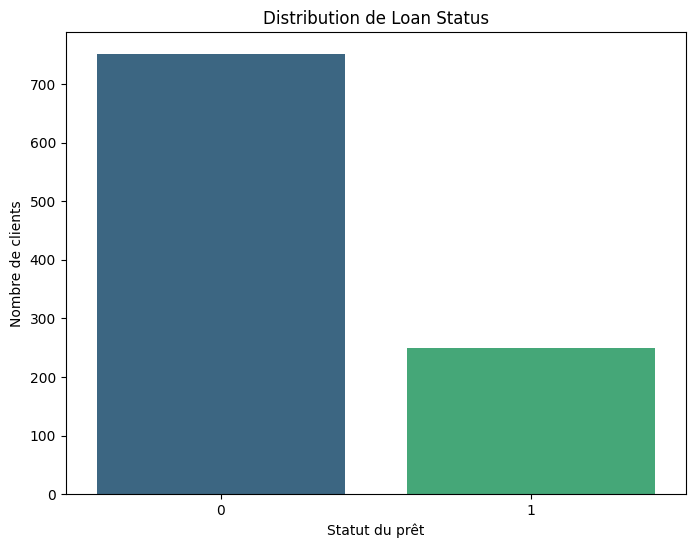


Répartition de Loan Status (en pourcentage) :
Loan Status
0    75.1
1    24.9
Name: proportion, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistiques descriptives générales
print(data_cleaned.describe())

# 2. Distribution de la variable cible 'Loan Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan Status', data=data_cleaned, palette='viridis')
plt.title('Distribution de Loan Status')
plt.xlabel('Statut du prêt')
plt.ylabel('Nombre de clients')
plt.show()

# 3. Vérification du déséquilibre de classes
loan_status_counts = data_cleaned['Loan Status'].value_counts(normalize=True)
print("\nRépartition de Loan Status (en pourcentage) :")
print(loan_status_counts * 100)


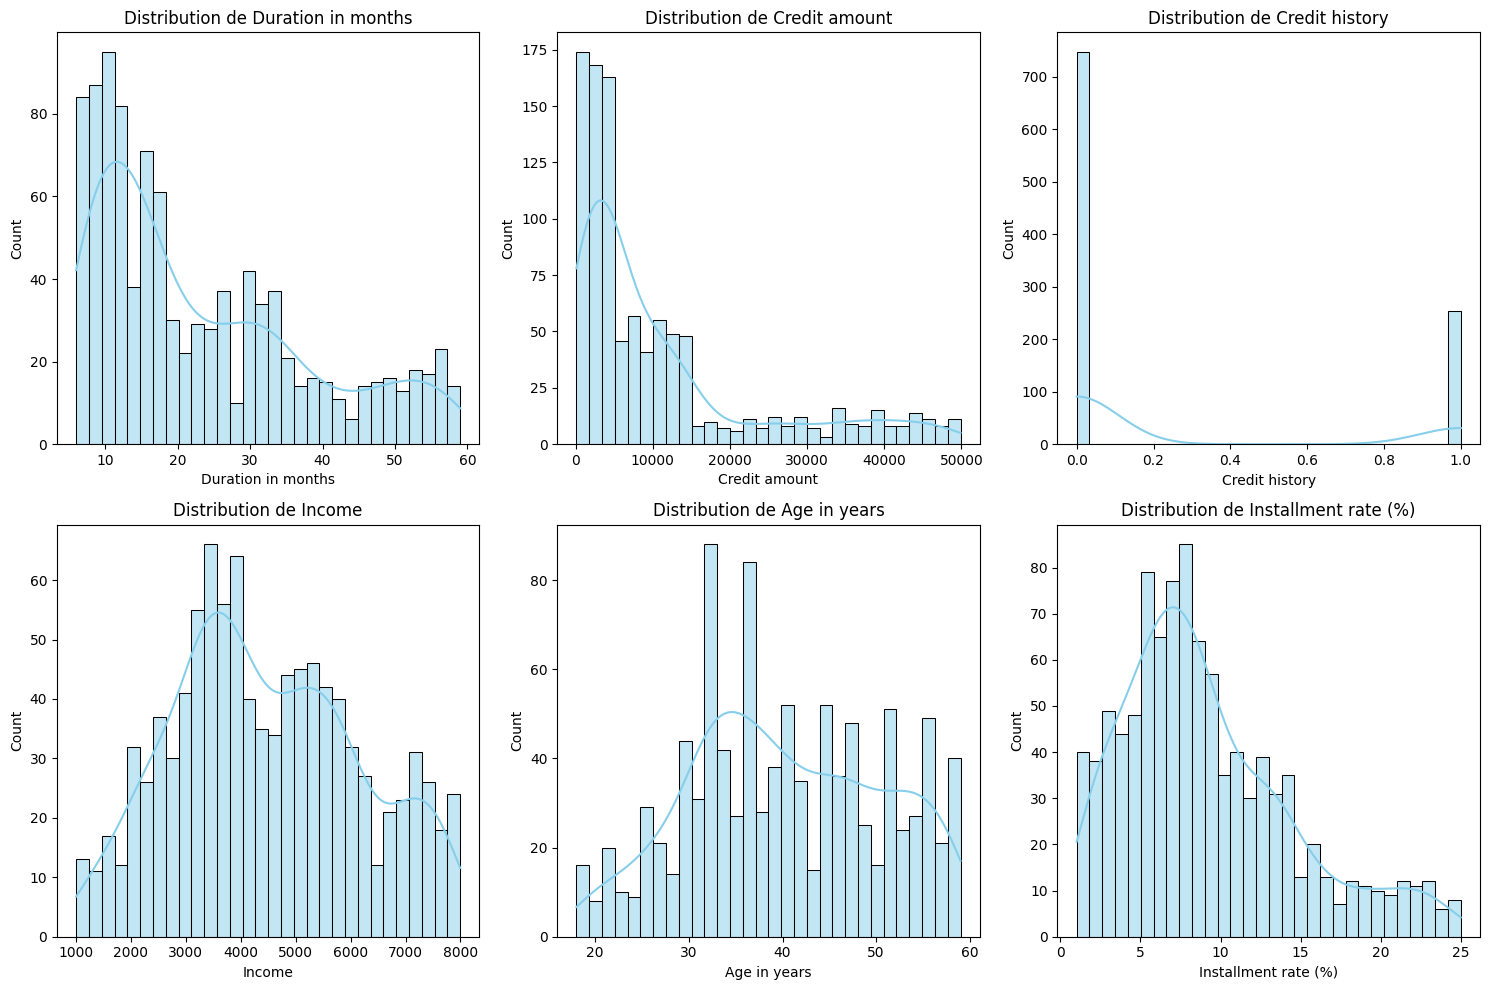

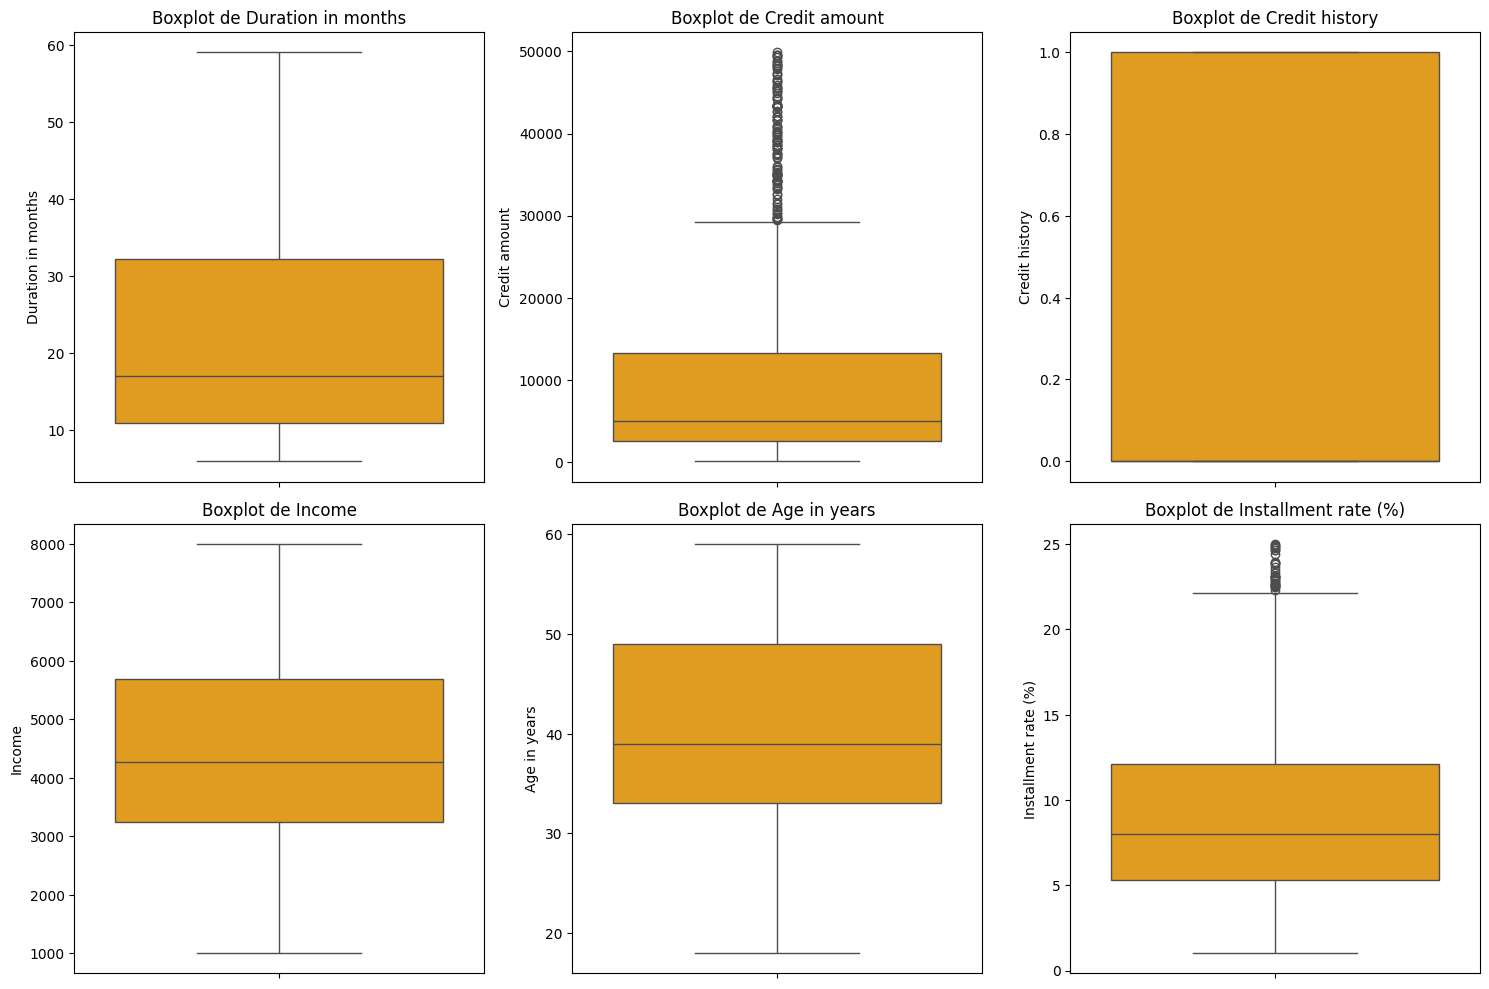

In [5]:
# Analyse univariée : Histogrammes et Boxplots
variables = ['Duration in months', 'Credit amount', 'Credit history',
             'Income', 'Age in years', 'Installment rate (%)']

# Affichage des histogrammes
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.histplot(data_cleaned[var], bins=30, color='skyblue', kde=True)
    plt.title(f'Distribution de {var}')
plt.tight_layout()
plt.show()

# Affichage des boxplots pour détecter les valeurs extrêmes
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data_cleaned[var], color='orange')
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


<ipython-input-6-130da7ffae9c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan Status', y=data_cleaned[var], data=data_cleaned, palette='viridis')
<ipython-input-6-130da7ffae9c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan Status', y=data_cleaned[var], data=data_cleaned, palette='viridis')
<ipython-input-6-130da7ffae9c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan Status', y=data_cleaned[var], data=data_cleaned, palette='viridis')
<ipython-input-6-130da7ffae9c>:5: FutureWarning: 

Passing `palette` without as

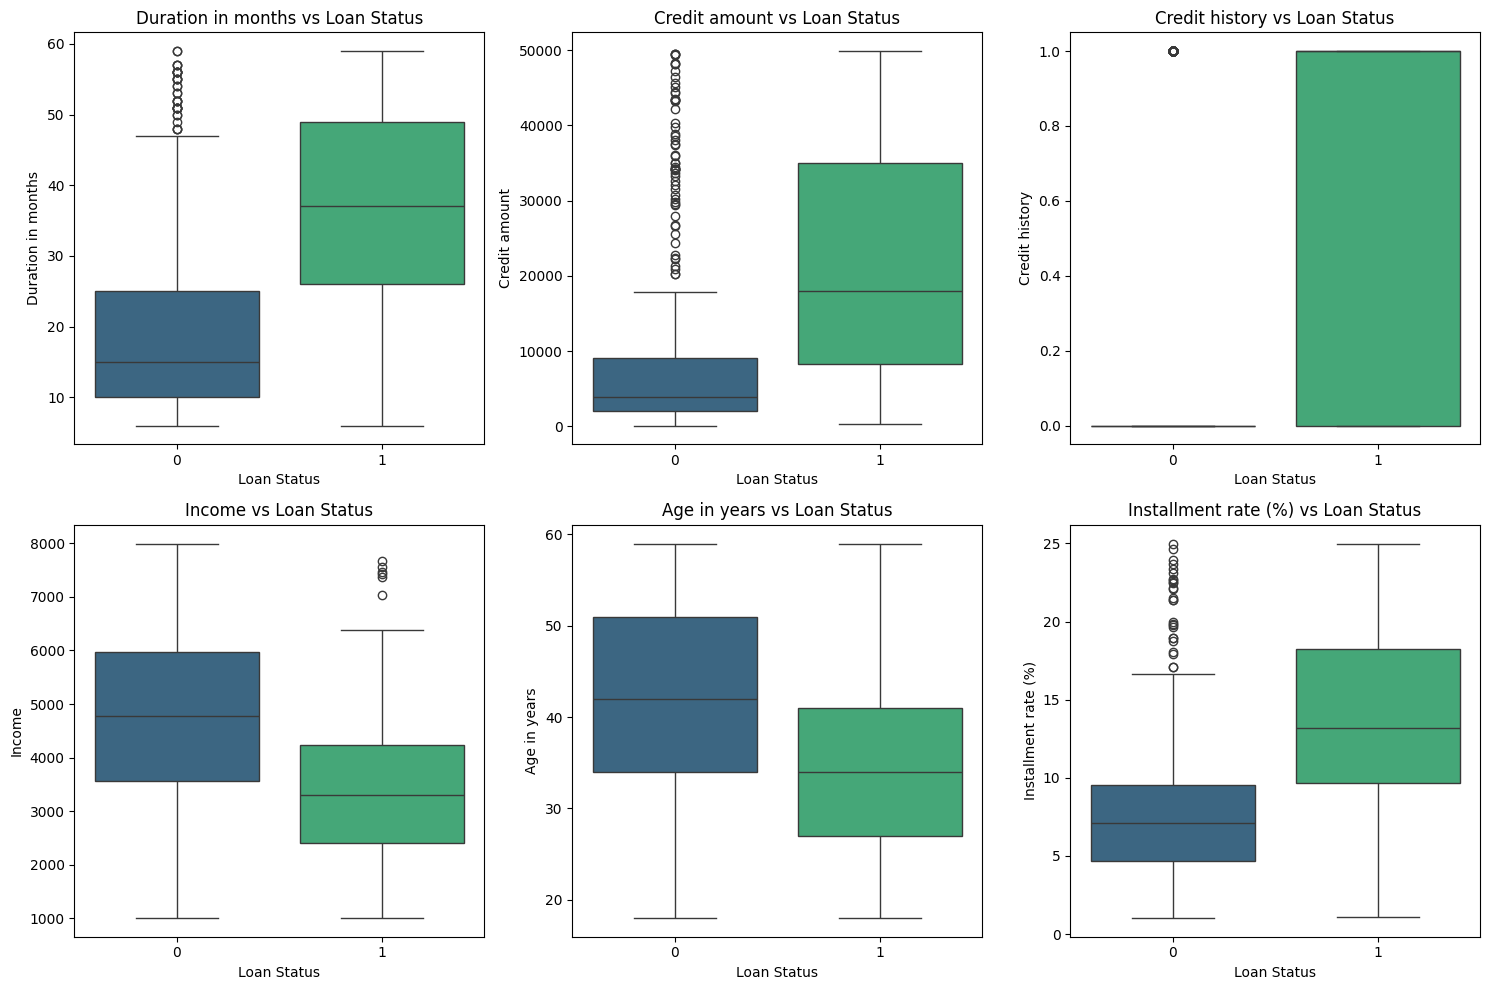

In [6]:
# Analyse bivariée : Relation avec Loan Status
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Loan Status', y=data_cleaned[var], data=data_cleaned, palette='viridis')
    plt.title(f'{var} vs Loan Status')
plt.tight_layout()
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Log Transformation pour atténuer les outliers
data_cleaned['Credit amount'] = np.log1p(data_cleaned['Credit amount'])
data_cleaned['Installment rate (%)'] = np.log1p(data_cleaned['Installment rate (%)'])

# 2. Normalisation des données
variables_to_normalize = ['Duration in months', 'Credit amount', 'Credit history',
                          'Income', 'Age in years', 'Installment rate (%)']

scaler = StandardScaler()
data_cleaned[variables_to_normalize] = scaler.fit_transform(data_cleaned[variables_to_normalize])

# 3. Vérification des données normalisées
print(data_cleaned.describe())


       Duration in months  Credit amount  Credit history        Income  \
count        1.000000e+03   1.000000e+03    1.000000e+03  1.000000e+03   
mean         6.750156e-17  -2.593481e-16    4.618528e-17 -2.229328e-16   
std          1.000500e+00   1.000500e+00    1.000500e+00  1.000500e+00   
min         -1.163924e+00  -3.091357e+00   -5.819691e-01 -2.049795e+00   
25%         -8.253380e-01  -5.973724e-01   -5.819691e-01 -7.272815e-01   
50%         -4.190344e-01  -7.929542e-02   -5.819691e-01 -1.225646e-01   
75%          6.136538e-01   6.915579e-01    1.718304e+00  7.248668e-01   
max          2.425091e+00   1.733466e+00    1.718304e+00  2.081969e+00   

       Age in years  Installment rate (%)  Loan Status  
count  1.000000e+03          1.000000e+03   1000.00000  
mean  -7.549517e-17         -1.687539e-16      0.24900  
std    1.000500e+00          1.000500e+00      0.43265  
min   -2.160934e+00         -2.617514e+00      0.00000  
25%   -7.054983e-01         -5.821738e-01      0

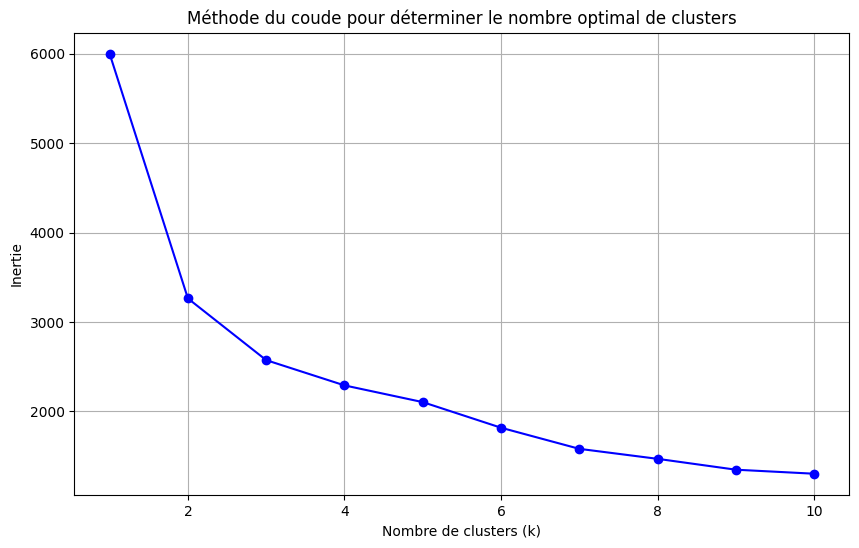

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned.drop(columns=['Loan Status']))
    inertia.append(kmeans.inertia_)

# 2. Affichage du graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='blue')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()



Centres des clusters :
   Duration in months  Credit amount  Credit history    Income  Age in years  \
0            0.172363       0.383931       -0.006901 -0.272626     -0.052816   
1            1.583871       1.310184        1.189133 -1.083548     -1.088604   
2           -0.798919      -0.809545       -0.515842  0.641855      0.508660   

   Installment rate (%)  
0              0.244139  
1              1.218014  
2             -0.683119  

Répartition des clients par cluster :
Cluster
2    487
0    300
1    213
Name: count, dtype: int64


<ipython-input-9-7b09f7a918ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data_cleaned, palette='viridis')


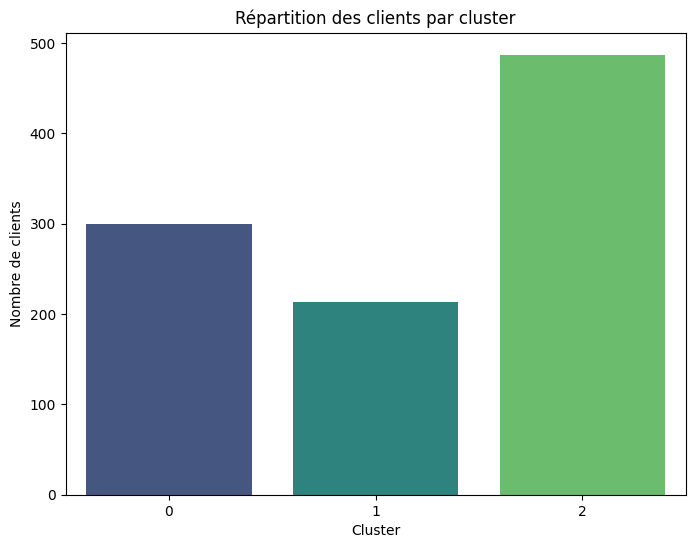

In [9]:
# 1. Application de K-means avec k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned.drop(columns=['Loan Status']))

# 2. Affichage des centres des clusters pour interprétation
centers = pd.DataFrame(kmeans.cluster_centers_, columns=data_cleaned.drop(columns=['Loan Status', 'Cluster']).columns)
print("\nCentres des clusters :")
print(centers)

# 3. Répartition des clients dans les clusters
cluster_counts = data_cleaned['Cluster'].value_counts()
print("\nRépartition des clients par cluster :")
print(cluster_counts)

# 4. Visualisation de la répartition des clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=data_cleaned, palette='viridis')
plt.title('Répartition des clients par cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Intégration des clusters comme caractéristique supplémentaire
X_with_cluster = data_cleaned.drop(columns=['Loan Status'])
#X_with_cluster['Cluster'] = data_cleaned['Cluster']  # On ajoute le cluster comme nouvelle colonne - Removed the re-assignment of cluster

# Define the target variable y
y = data_cleaned['Loan Status']

# 2. Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.3, random_state=42)

# 3. Modélisation avec SVM en incluant le cluster
svm_model_cluster = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model_cluster.fit(X_train, y_train)

# 4. Prédictions et évaluation du modèle avec cluster
y_pred_cluster = svm_model_cluster.predict(X_test)

print("\nMatrice de confusion (avec Cluster) :")
print(confusion_matrix(y_test, y_pred_cluster))

print("\nRapport de classification (avec Cluster) :")
print(classification_report(y_test, y_pred_cluster))

print("\nPrécision du modèle (avec Cluster) :")
print(accuracy_score(y_test, y_pred_cluster))


Matrice de confusion (avec Cluster) :
[[160  61]
 [ 11  68]]

Rapport de classification (avec Cluster) :
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       221
           1       0.53      0.86      0.65        79

    accuracy                           0.76       300
   macro avg       0.73      0.79      0.74       300
weighted avg       0.83      0.76      0.77       300


Précision du modèle (avec Cluster) :
0.76


In [12]:
from sklearn.model_selection import GridSearchCV

# 1. Définition des paramètres à tester pour le SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly']
}

# 2. Tuning des hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# 3. Meilleurs paramètres trouvés
print("\nMeilleurs paramètres trouvés :")
print(grid_search.best_params_)

# 4. Entraînement du SVM avec les meilleurs paramètres
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# 5. Prédictions et évaluation du modèle optimisé
y_pred_best = best_svm.predict(X_test)

print("\nMatrice de confusion (SVM optimisé) :")
print(confusion_matrix(y_test, y_pred_best))

print("\nRapport de classification (SVM optimisé) :")
print(classification_report(y_test, y_pred_best))

print("\nPrécision du modèle (SVM optimisé) :")
print(accuracy_score(y_test, y_pred_best))



Meilleurs paramètres trouvés :
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Matrice de confusion (SVM optimisé) :
[[162  59]
 [ 13  66]]

Rapport de classification (SVM optimisé) :
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       221
           1       0.53      0.84      0.65        79

    accuracy                           0.76       300
   macro avg       0.73      0.78      0.73       300
weighted avg       0.82      0.76      0.77       300


Précision du modèle (SVM optimisé) :
0.76


In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# 1. Application de SMOTE pour le rééquilibrage des classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_with_cluster, y)

print("\nDistribution des classes après SMOTE :")
print(pd.Series(y_resampled).value_counts())

# 2. Séparation des données en train et test (après SMOTE)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 3. Tuning avancé des hyperparamètres avec GridSearchCV
param_grid_advanced = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
    'kernel': ['rbf']
}

grid_search_advanced = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid_advanced, cv=5, scoring='f1')
grid_search_advanced.fit(X_train_smote, y_train_smote)

# 4. Meilleurs paramètres trouvés
print("\nMeilleurs paramètres trouvés (SMOTE + Tuning avancé) :")
print(grid_search_advanced.best_params_)

# 5. Entraînement du SVM avec les meilleurs paramètres (après SMOTE)
best_svm_smote = grid_search_advanced.best_estimator_
best_svm_smote.fit(X_train_smote, y_train_smote)

# 6. Prédictions et évaluation du modèle optimisé (SMOTE)
y_pred_smote = best_svm_smote.predict(X_test_smote)

print("\nMatrice de confusion (SMOTE + SVM optimisé) :")
print(confusion_matrix(y_test_smote, y_pred_smote))

print("\nRapport de classification (SMOTE + SVM optimisé) :")
print(classification_report(y_test_smote, y_pred_smote))

print("\nPrécision du modèle (SMOTE + SVM optimisé) :")
print(accuracy_score(y_test_smote, y_pred_smote))



Distribution des classes après SMOTE :
Loan Status
0    751
1    751
Name: count, dtype: int64

Meilleurs paramètres trouvés (SMOTE + Tuning avancé) :
{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}

Matrice de confusion (SMOTE + SVM optimisé) :
[[165  47]
 [ 30 209]]

Rapport de classification (SMOTE + SVM optimisé) :
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       212
           1       0.82      0.87      0.84       239

    accuracy                           0.83       451
   macro avg       0.83      0.83      0.83       451
weighted avg       0.83      0.83      0.83       451


Précision du modèle (SMOTE + SVM optimisé) :
0.8292682926829268


  0%|          | 0/451 [00:00<?, ?it/s]

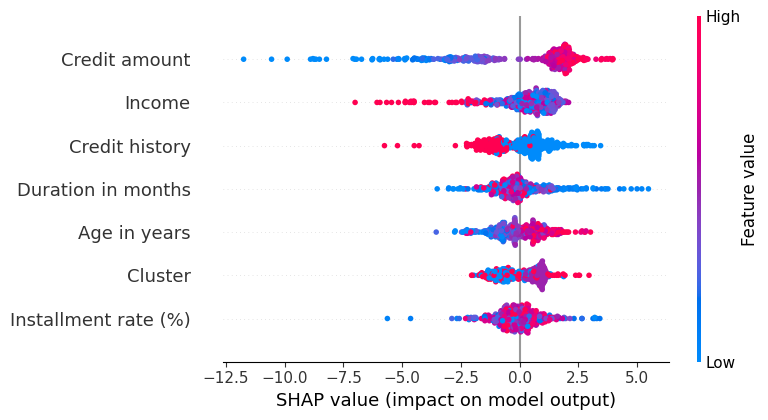

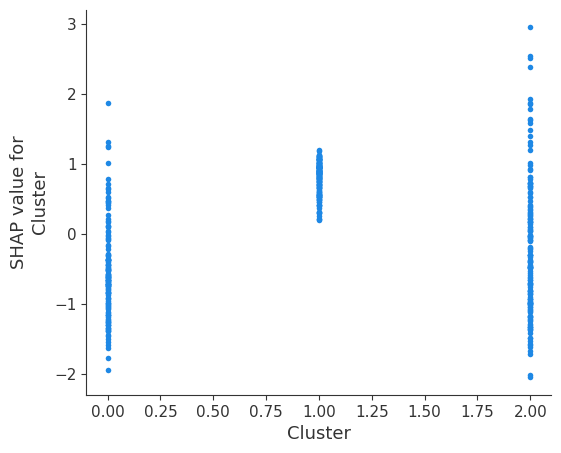

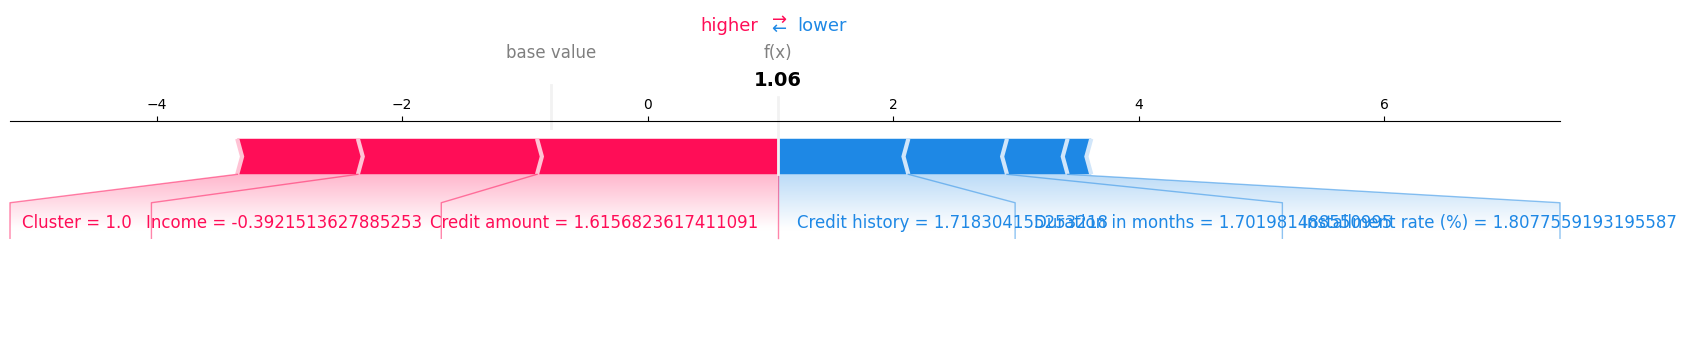

In [14]:
import shap

# 1. Création de l'explainer SHAP pour le SVM optimisé
explainer = shap.KernelExplainer(best_svm_smote.decision_function, X_train_smote)
shap_values = explainer.shap_values(X_test_smote, nsamples=100)

# 2. Summary Plot : Importance globale des variables
shap.summary_plot(shap_values, X_test_smote, feature_names=X_test_smote.columns)

# 3. Impact des clusters sur les prédictions
shap.dependence_plot("Cluster", shap_values, X_test_smote, interaction_index=None)

# 4. Explication des décisions individuelles (Force Plot)
# On affiche l'explication pour la première observation du test
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_smote.iloc[0,:], matplotlib=True)


In [15]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming data_cleaned, X_with_cluster, and y are defined in previous cells
# The user has not provided the data loading so we can assume these are already defined.
# We will use dummy data to simulate the previous notebook cells.
data = pd.DataFrame({
    'Duration in months': [10, 20, 30, 40, 50, 15, 25, 35, 45, 55, 12, 22, 32, 42, 52],
    'Credit amount': [1000, 2000, 3000, 4000, 5000, 1500, 2500, 3500, 4500, 5500, 1200, 2200, 3200, 4200, 5200],
    'Credit history': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Income': [3000, 4000, 5000, 6000, 7000, 3500, 4500, 5500, 6500, 7500, 3200, 4200, 5200, 6200, 7200],
    'Age in years': [20, 30, 40, 50, 60, 25, 35, 45, 55, 65, 22, 32, 42, 52, 62],
    'Installment rate (%)': [2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6],
    'Loan Status': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
    'Cluster': [0,1,2,0,1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1]
})
data_cleaned = data.copy()
X_with_cluster = data_cleaned.drop(columns=['Loan Status'])
y = data_cleaned['Loan Status']


# 1. Application of SMOTE for balancing classes BEFORE train_test_split
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_with_cluster, y)


# 2. Split data into train and test AFTER SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 3. Advanced hyperparameter tuning with GridSearchCV
param_grid_advanced = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
    'kernel': ['rbf']
}

grid_search_advanced = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid_advanced, cv=5, scoring='f1')
grid_search_advanced.fit(X_train_smote, y_train_smote)


# 4. Best parameters found
print("\nBest parameters found (SMOTE + Advanced Tuning):")
print(grid_search_advanced.best_params_)

# 5. Training SVM with the best parameters (after SMOTE)
best_svm_smote = grid_search_advanced.best_estimator_
best_svm_smote.fit(X_train_smote, y_train_smote)

# Save the model
with open('svm_credit_risk_model.pkl', 'wb') as file:
    pickle.dump(best_svm_smote, file)

# Fit the scaler with the whole dataset (including clusters) before saving it for prediction
variables_to_normalize = ['Duration in months', 'Credit amount', 'Credit history',
                          'Income', 'Age in years', 'Installment rate (%)', 'Cluster']
scaler = StandardScaler()
scaler.fit(X_with_cluster[variables_to_normalize]) # fit on whole dataset with clusters

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")


Best parameters found (SMOTE + Advanced Tuning):
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Model and scaler saved successfully!


In [19]:
import streamlit as st
import numpy as np
import pickle

# 1. Chargement du modèle et du scaler
with open('svm_credit_risk_model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# 2. Titre de l'application
st.title("Prédiction du Risque de Crédit")

# 3. Saisie des variables pertinentes
st.header("Entrez les détails du client :")

duration_in_months = st.number_input("Durée en mois du prêt :", min_value=6, max_value=60, value=12)
credit_amount = st.number_input("Montant du crédit :", min_value=100, max_value=50000, value=1000)
credit_history = st.selectbox("Historique de crédit :", [0, 1], help="0 = Historique favorable, 1 = Historique défavorable")
income = st.number_input("Revenu mensuel :", min_value=1000, max_value=10000, value=4000)
age_in_years = st.number_input("Âge du client :", min_value=18, max_value=100, value=30)
installment_rate = st.number_input("Taux d'installation (%) :", min_value=1, max_value=25, value=10)
cluster = st.selectbox("Cluster :", [0, 1, 2], help="Segment client basé sur K-means")

# 4. Bouton pour prédire
if st.button("Prédire le Risque de Crédit"):
    # Création de l'input pour le modèle
    input_data = np.array([[
        duration_in_months,
        credit_amount,
        credit_history,
        income,
        age_in_years,
        installment_rate,
        cluster
    ]])

    # Normalisation des données
    input_data_scaled = scaler.transform(input_data)

    # Prédiction
    prediction = model.predict(input_data_scaled)
    result = "❌ Défaut de paiement" if prediction[0] == 1 else "✅ Pas de défaut"

    # 5. Affichage du résultat
    st.subheader("Résultat de la Prédiction :")
    st.markdown(f"### {result}")


2025-02-22 04:25:01.567 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 04:25:01.797 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-22 04:25:01.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 04:25:01.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 04:25:01.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 04:25:01.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 04:25:01.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 04:25:01.813 Thread 'MainThread': mi

In [21]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.165.9:8501

browser.gatherUsageStats=false
false
  Stopping...
^C
